# K Means Clustering
**Project to use K Means Clustering to group University by Private/Public**  
  
### Data:

01. Private: If the university is or not private (use just to check results)
02. Apps: Number of subscriptions received
03. Accept: Number of subscriptions accepted
04. Enroll: Number of students enrolled
05. Top10perc: Percentage of new students who came from the best 10% group on high school
06. Top25perc: Percentage of new studantes who came from the best 25% group on high school
07. F.Undergrad: number of full-time undergraduate students
08. P.Undergrad: number of part-time undergraduate students
09. Outstate: Classes out of state
10. Room.Board: Room cost
11. Books: Estimated Book Cost
12. Personal: Estimated spending per person
13. PhD: Percentage of PHD's at University
14. Terminal: Percentage of College with graduation
15. S.F.Ratio: Studentes/college rate
16. perc.alumni: Percentage of alumni who donates
17. Expend: University expenses per student
18. Grad.Rate: Graduation rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
file = "//home//vinicius//Data_Science//Notebooks//Data_Files//College_Data"

In [3]:
df1 = pd.read_csv(file, index_col=0) ##University Names = Index

In [4]:
df1.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df1.Private.value_counts() ## final result

Yes    565
No     212
Name: Private, dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [10]:
df1.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


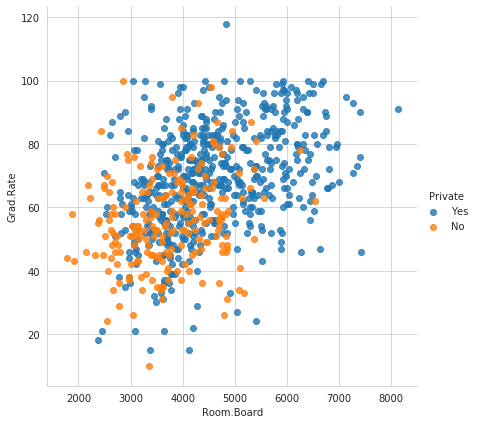

In [15]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df1, hue='Private', fit_reg=False, height=6) 
## private colleges room cost is >= public cost 

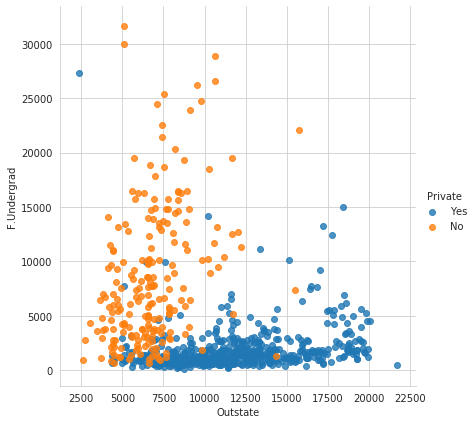

In [18]:
sns.lmplot(x='Outstate', y='F.Undergrad', hue='Private', data=df1 , fit_reg=False, height=6)

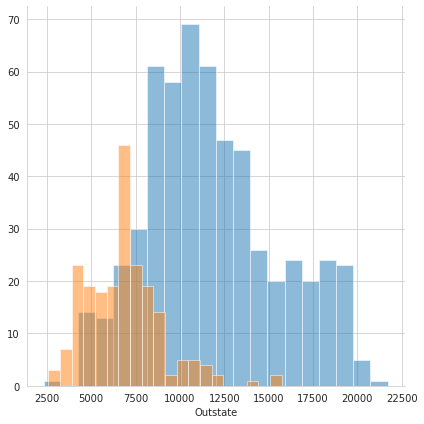

In [33]:
g = sns.FacetGrid(data=df1,hue='Private', height=6,)
g.map(plt.hist, 'Outstate', bins=20, alpha=0.5)

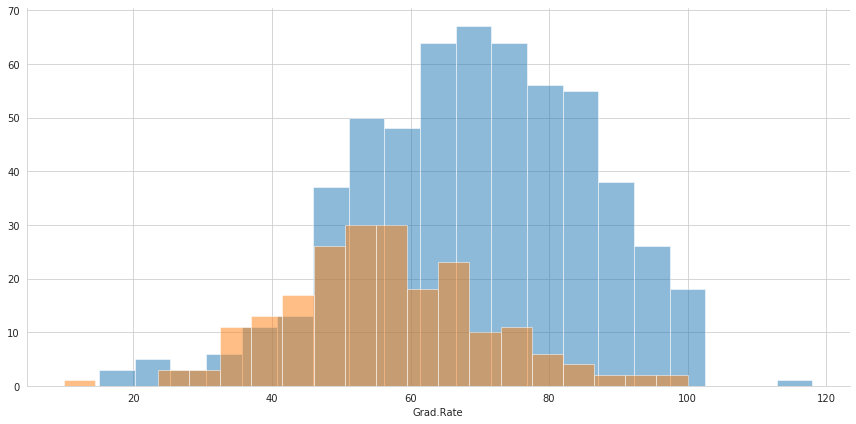

In [38]:
g = sns.FacetGrid(data=df1,hue='Private', height=6, aspect=2)
g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.5)

**We have one school with grad rate over 100%... ???**

In [43]:
df1[df1['Grad.Rate']>100]['Grad.Rate']

Cazenovia College    118
Name: Grad.Rate, dtype: int64

### Cazenovia College have Grad.Rate over 100%
**This is wrong, will change to 100% to work**

In [ ]:
df1['Grad.Rate']['Cazenovia College'] = 100

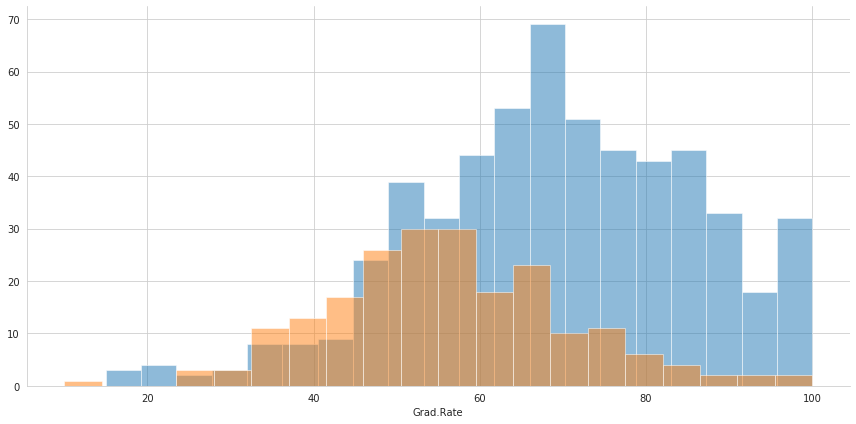

In [52]:
## PLOT Again to check if the value is gone
g = sns.FacetGrid(data=df1,hue='Private', height=6, aspect=2)
g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.5)

In [66]:
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(n_clusters=2)

In [68]:
train = df1.drop('Private',axis=1)
train.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [69]:
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01, 3.14814815e-01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01, 7.93721973e-01]])

**Will use the private label to evaluate the model**  
**Of course, its just to study, a real Dataset will not have this data**

In [71]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [72]:
df1['Cluster'] = df1['Private'].apply(converter)

In [73]:
df1.Cluster.value_counts()

1    565
0    212
Name: Cluster, dtype: int64

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
print(confusion_matrix(df1['Cluster'], kmeans.labels_))
print('\n')
print(classification_report(df1['Cluster'], kmeans.labels_))

[[ 74 138]
 [ 34 531]]


              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



**Not so bad**
**This algorithim is usefull if we have to group not cataloged data**